<a href="https://colab.research.google.com/github/shreya-gh/shreya-gh/blob/main/NEO_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asteroid Classification [Hazardous or Not]
**Problem Statement**

NASA and space agencies track Near-Earth Objects (NEOs), including asteroids that might pose a threat to Earth. The goal of this project is to predict whether an asteroid is hazardous or not using machine learning classification models.

**Dataset**

NASA's Near-Earth Object (NEO) dataset (from Kaggle )
The dataset consists of

*   *4687 data instances* (columns)
*   *40 features* (rows)

There is no null values.

Given below are the column names.



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving nasa.csv to nasa (1).csv


Rows: 4687, Columns: 40

Data Description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Ap

<ipython-input-2-e0ba61eb9555>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hazardous', palette='Set2')


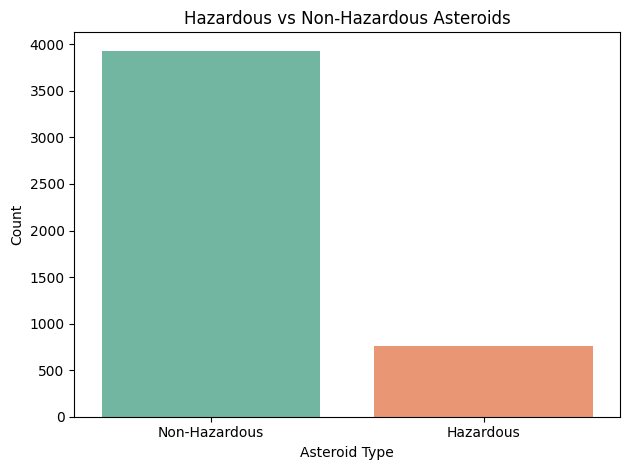

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
    df = pd.read_csv('nasa.csv')
except FileNotFoundError:
    print("Error: 'nasa.csv' not found. Please upload the file to your Colab environment.")
    df = None
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nData Description\n")
df.info()

print("\nTotal Missing Values:", df.isnull().sum().sum())

df['Hazardous'] = df['Hazardous'].astype(int)

sns.countplot(data=df, x='Hazardous', palette='Set2')
plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.title('Hazardous vs Non-Hazardous Asteroids')
plt.xlabel('Asteroid Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [ ]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


In [ ]:
print("\nUnique values per column:\n", df.nunique())


Unique values per column:
 Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Oscu

- **'Name' and 'Neo Reference ID'**: These features are identifiers and don't contribute to predicting whether an asteroid is hazardous. Both features contain the same values, so they can be deleted.
- **'Close Approach Date'**: This feature provides the date the asteroid will be closest to Earth, which doesn't help in predicting hazard status, so it can be deleted.
- **'Orbit Determination Date'**: Similar to the Close Approach Date, this feature gives timing information and is not useful for classification, so it should be deleted.
- **'Orbiting Body'**: This feature only contains one value, "Earth," so it doesn't add useful information and should be deleted.
- **'Equinox'**: This feature contains only one value, "J2000," so it is not contributing to the model and can be deleted.



In [ ]:

c_drop = [
    'Equinox',
    'Orbiting Body',
    'Orbit Determination Date',
    'Neo Reference ID',
    'Name',
    'Orbit ID',
    'Close Approach Date',
    'Epoch Date Close Approach'
]

df = df.drop(columns=c_drop)
df = df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
             'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)',
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis=1)

print(df.columns.tolist())




['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']


KeyError: "['Equinox', 'Orbiting Body', 'Orbit Determination Date', 'Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date', 'Epoch Date Close Approach'] not found in axis"

The **Correlation Matrix** denotes that there are some features correlated with each other, meaning they have same values

 (‘Est Dia in KM(min)’, ‘Est Dia in KM(max)’, ‘Est Dia in M(min)’, ‘Est Dia in M(max)’, ‘Est Dia in Miles(min)’, ‘Est Dia in Miles(max)’, ‘Est Dia in Feet(min)’, ‘Est Dia in Feet(max)’)

which means they can be removed.
This helps in reducing redundancy and dimensionality.

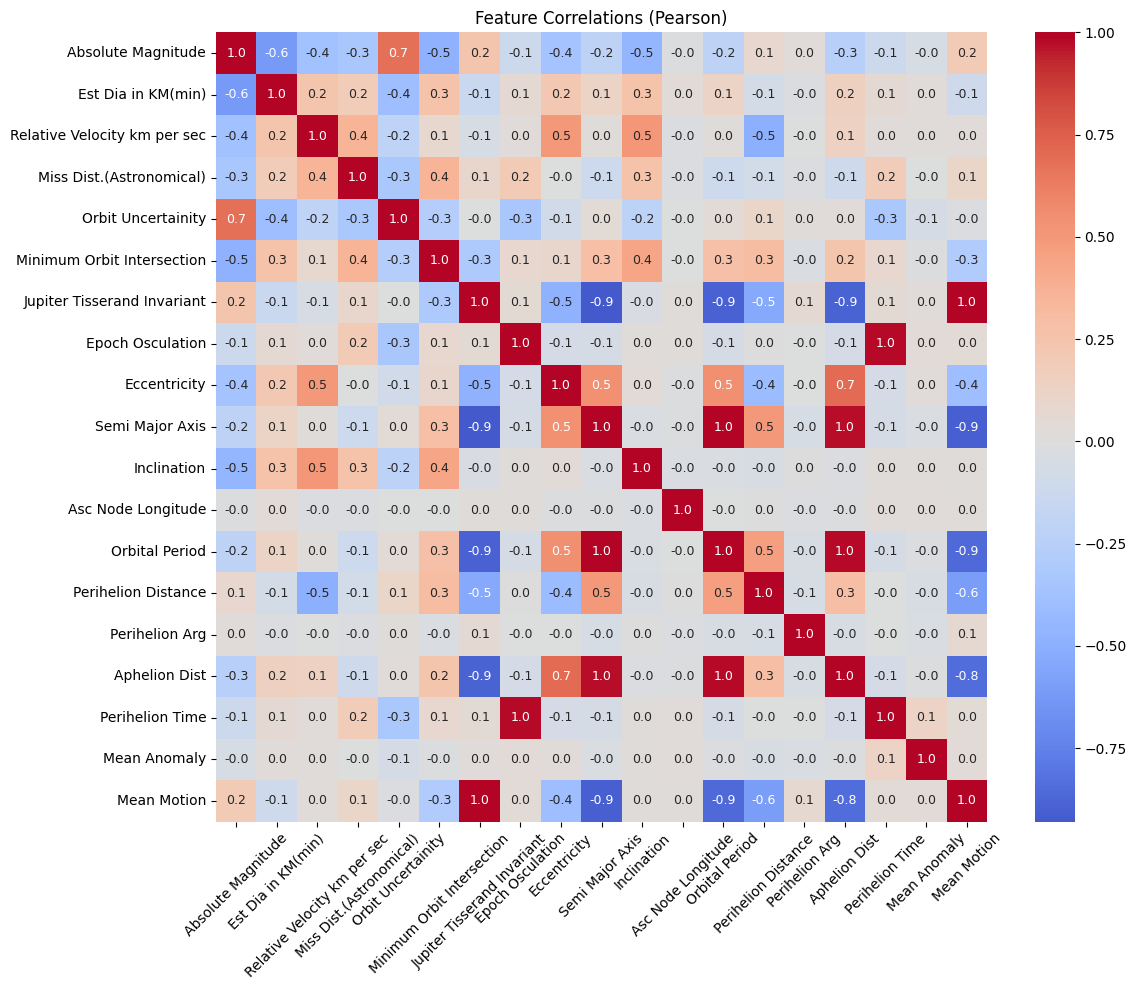

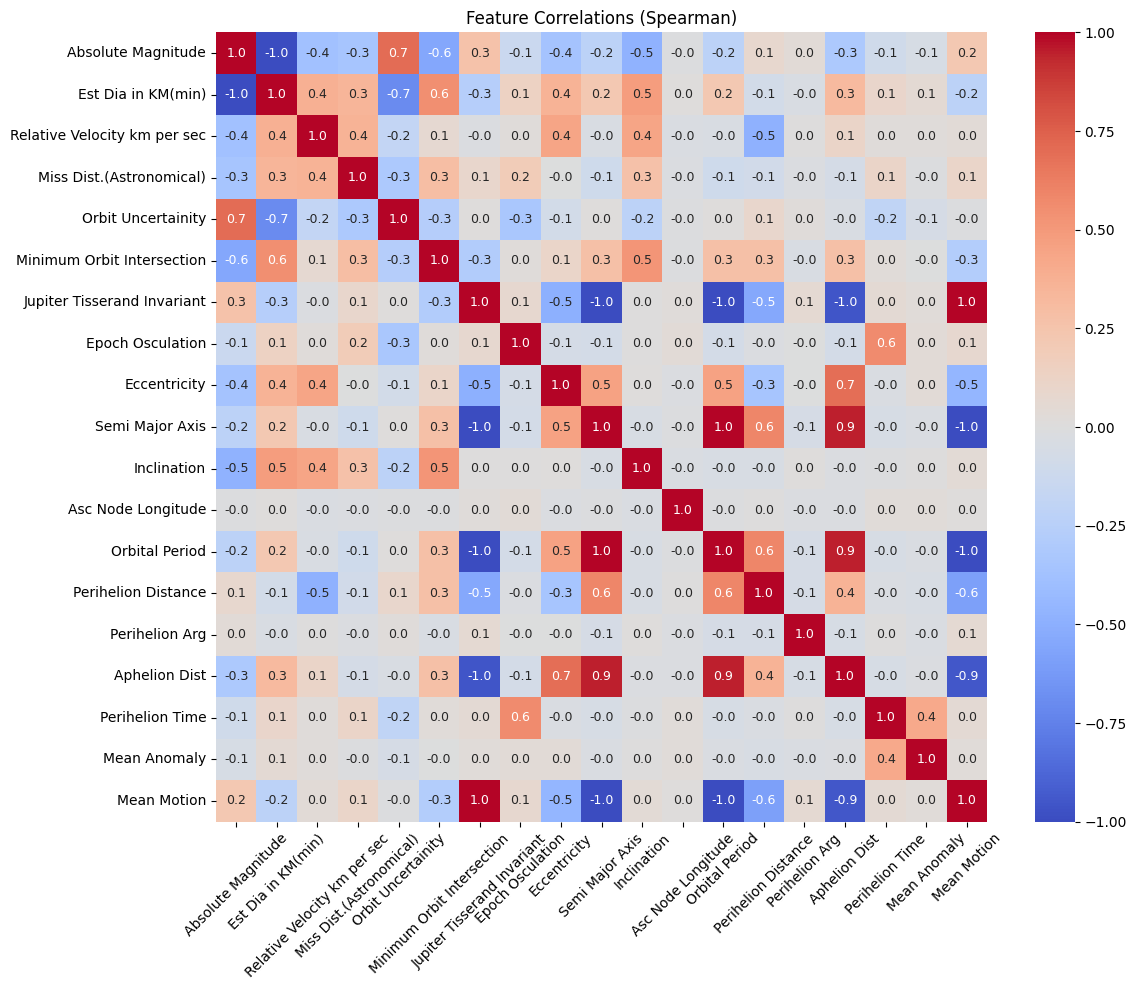

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_sc= pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_sc= pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


pearson_corr = X_train_sc.corr()
spearman_corr = X_train_sc.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, cmap='coolwarm', center=0,
           annot=True, fmt=".1f", annot_kws={"size": 9})
plt.title("Feature Correlations (Pearson)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0,
           annot=True, fmt=".1f", annot_kws={"size": 9})
plt.title("Feature Correlations (Spearman)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



We have dropped features with perfect correlation to reduce dimensionality and reduction

The correlation is as follows,


In [ ]:
spr_corr  = X_train_sc.apply(lambda col: col.corr(y_train, method='spearman')).sort_values(ascending=False)

print("\nCorrelation with target feature:")
print(spr_corr.to_string(float_format="%.3f"))


NameError: name 'X_train_sc' is not defined

In [ ]:
pf_cols = []
for col in X_train_sc.columns:
    corrs = X_train_sc.corrwith(X_train_sc[col]).abs()
    mtch = corrs[(corrs == 1.0) & (corrs.index != col)].index.tolist()
    pf_cols.extend(mtch)

print("Columns with perfect correlation:")
print([col for col in X_train_sc.columns if col in pf_cols])

Columns with perfect correlation:
['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr', 'Miles per hour']


['Absolute Magnitude', 'Est Dia in KM(min)', 'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']


Here we are using **SMOTE**, as the count plot depicts that it is a case of an imbalanced dataset. 83.89% of the data instances are labelled as 0 (not hazardous) and only 16.10% are labelled as 1 (hazardous), to make the dataset balanced.


In [ ]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE - Class distribution:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_sc, y_train)
print("After SMOTE - Class distribution:", np.bincount(y_train_sm))


Before SMOTE - Class distribution: [2738  542]
After SMOTE - Class distribution: [2738 2738]


Feature Scaling using **Standard Scaler**

Best Parameters Found: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 19}

Validation Set Performance (Pruned):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       604
           1       0.96      0.99      0.98        99

    accuracy                           0.99       703
   macro avg       0.98      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703

ROC AUC: 0.994

Test Set Performance (Pruned):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       590
           1       0.96      1.00      0.98       114

    accuracy                           0.99       704
   macro avg       0.98      1.00      0.99       704
weighted avg       0.99      0.99      0.99       704

ROC AUC: 1.000


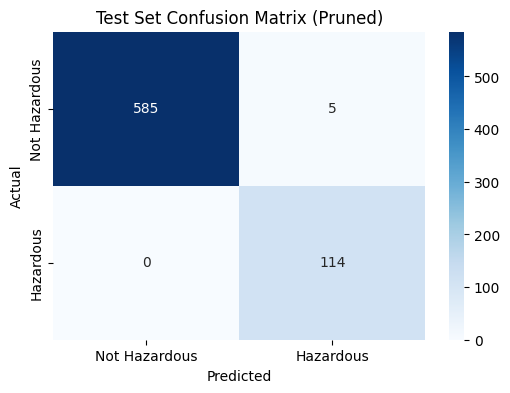

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# parameter for pruning
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(
    dt, param_distributions=param_dist,
    n_iter=50, cv=cv, scoring='roc_auc',
    random_state=42, n_jobs=-1
)

rand_search.fit(X_train_sm, y_train_sm)

best_dt = rand_search.best_estimator_
print("Best Parameters Found:", rand_search.best_params_)

# Evaluation on Validation Set
y_val_pred = best_dt.predict(X_val_sc)
y_val_proba = best_dt.predict_proba(X_val_sc)[:, 1]
print("\nValidation Set Performance (Pruned):")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba):.3f}")

# Evaluation on Test Set
y_test_pred = best_dt.predict(X_test_sc)
y_test_proba = best_dt.predict_proba(X_test_sc)[:, 1]
print("\nTest Set Performance (Pruned):")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.3f}")




# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
plt.title('Test Set Confusion Matrix (Pruned)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Cross-Validation ROC AUC Scores: [0.99270073 1.         1.         0.99725944 0.99817185]
Mean ROC AUC: 0.998

Validation Set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.99      0.99      0.99        99

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703

ROC AUC: 0.994

Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       590
           1       0.97      1.00      0.99       114

    accuracy                           1.00       704
   macro avg       0.99      1.00      0.99       704
weighted avg       1.00      1.00      1.00       704

ROC AUC: 0.997


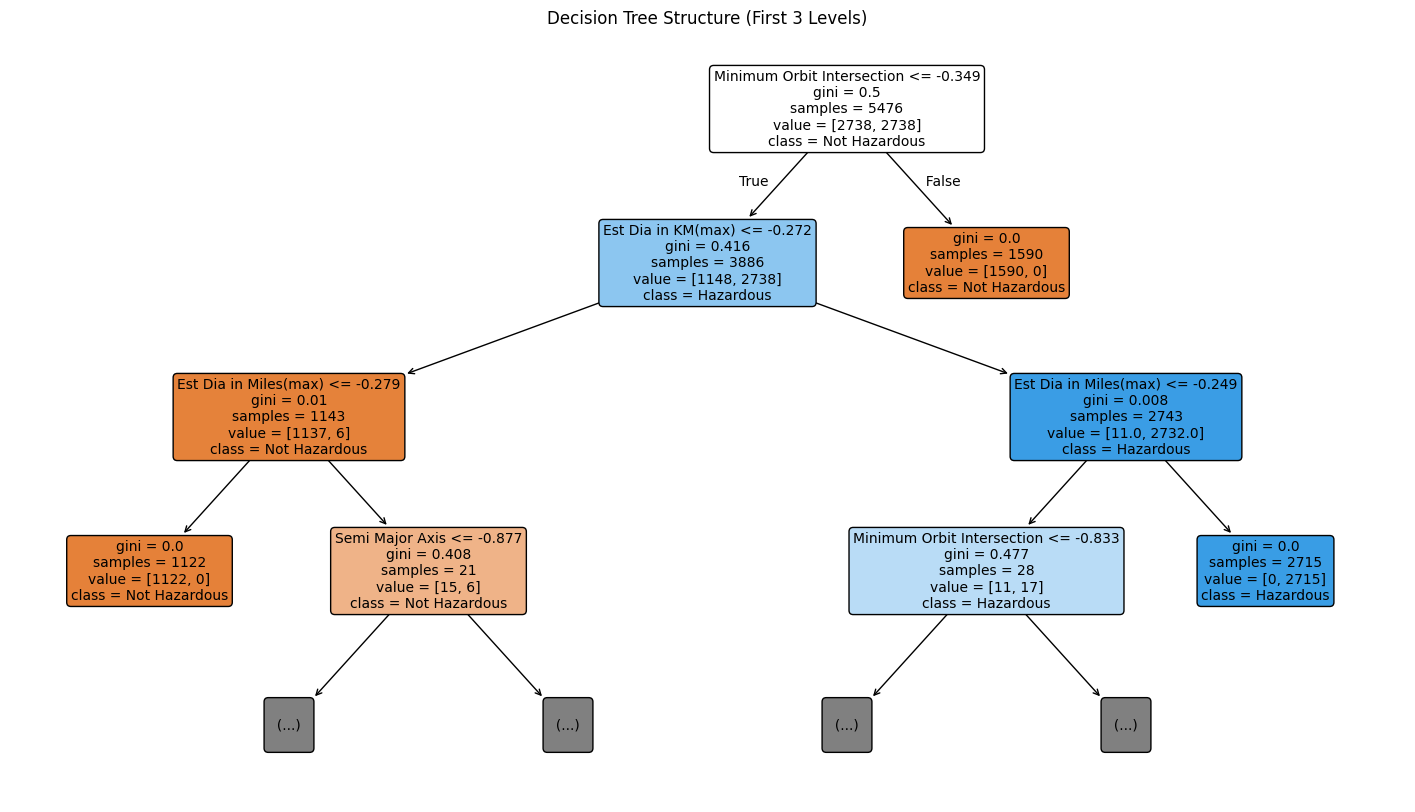

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)

# Cross-Validation
cv = StratifiedKFold(n_splits=5)
cvsc = cross_val_score(dt, X_train_sm, y_train_sm, cv=cv, scoring='roc_auc')

print("Cross-Validation ROC AUC Scores:", cv_scores)
print(f"Mean ROC AUC: {np.mean(cv_scores):.3f}")

dt.fit(X_train_sm, y_train_sm)

# Validation Set
y_val_pred = dt.predict(X_val_sc)
y_val_prob = dt.predict_proba(X_val_sc)[:, 1]
print("\nValidation Set ")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_prob):.3f}")

# Test Set
y_test_pred = dt.predict(X_test_sc)
y_test_prob = dt.predict_proba(X_test_sc)[:, 1]
print("\nTest Set:")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_prob):.3f}")


# Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=['Not Hazardous', 'Hazardous'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()

Accuracy: 99.57%

Insight: The Decision Tree model achieved the highest performance across all metrics. Its perfect recall (1.0) means it identified all hazardous asteroids, which is extremely important for this problem. However, it may be prone to overfitting if not properly pruned.

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       604
           1       0.60      0.93      0.73        99

    accuracy                           0.90       703
   macro avg       0.79      0.91      0.83       703
weighted avg       0.93      0.90      0.91       703

Validation ROC AUC: 0.994
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       590
           1       0.67      0.95      0.78       114

    accuracy                           0.91       704
   macro avg       0.83      0.93      0.86       704
weighted avg       0.94      0.91      0.92       704

Test ROC AUC: 0.954


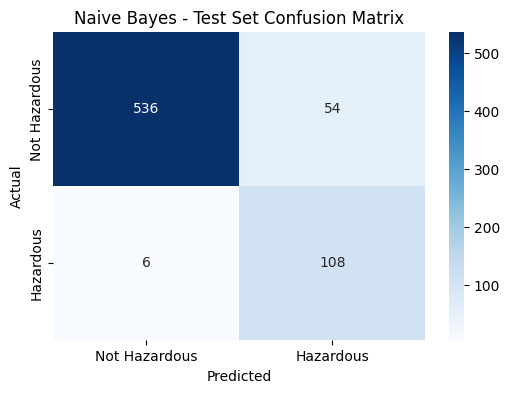

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_sm, y_train_sm)

y_val_pred = nb.predict(X_val_sc)
y_val_prob = nb.predict_proba(X_val_sc)[:,1]
print(classification_report(y_val, y_val_pred))
print(f"Validation ROC AUC: {roc_auc_score(y_val, y_val_proba):.3f}")

y_test_pred = nb.predict(X_test_sc)
y_test_prob = nb.predict_proba(X_test_sc)[:,1]
print(classification_report(y_test, y_test_pred))
print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_prob):.3f}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
xticklabels=['Not Hazardous','Hazardous'],
yticklabels=['Not Hazardous','Hazardous'])
plt.title('Naive Bayes - Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Accuracy: 91.47%

Insight: Naive Bayes had very high recall (0.95) but low precision (0.66), meaning it tends to predict many false positives. Useful when missing a hazardous case is worse than flagging a few non-hazardous ones.

VAL SET:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       604
           1       0.67      0.95      0.78        99

    accuracy                           0.93       703
   macro avg       0.83      0.94      0.87       703
weighted avg       0.95      0.93      0.93       703

ROC AUC: 0.987

TEST SET P:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       590
           1       0.75      0.96      0.85       114

    accuracy                           0.94       704
   macro avg       0.87      0.95      0.91       704
weighted avg       0.95      0.94      0.95       704

ROC AUC: 0.985


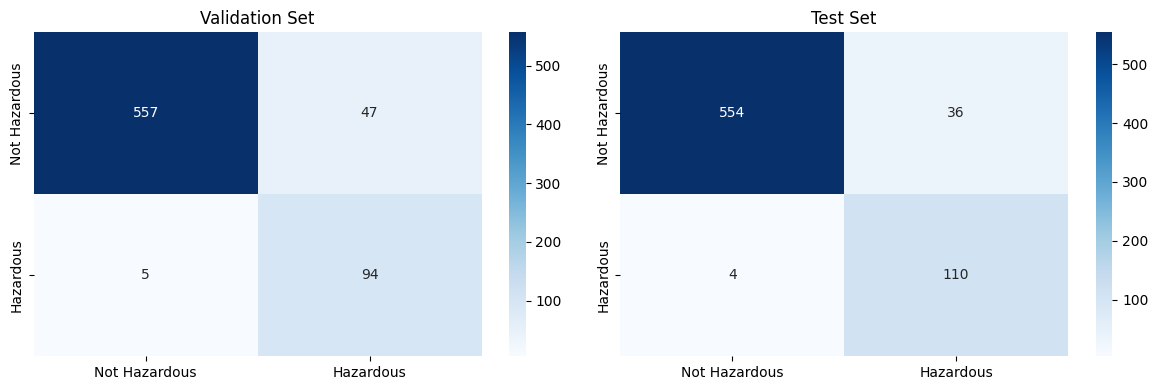

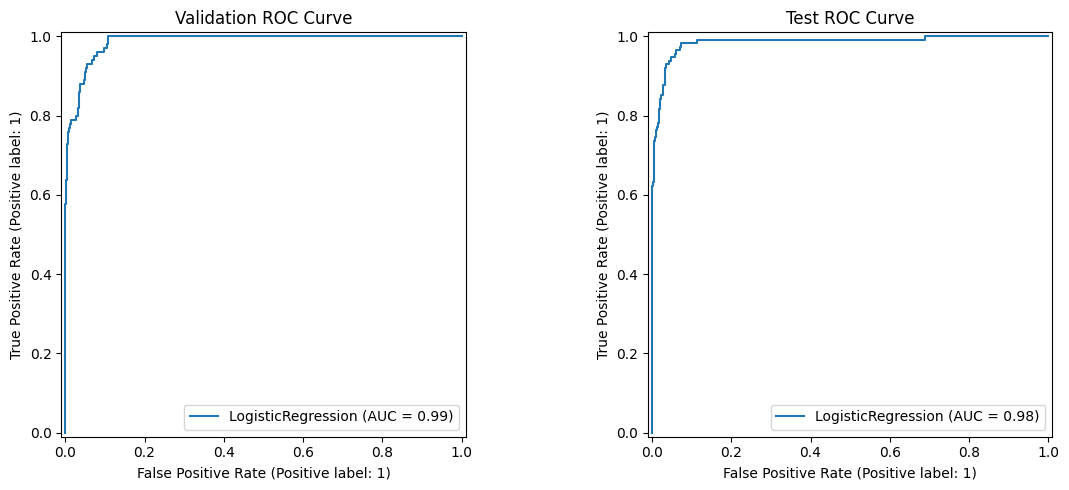

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_sm, y_train_sm)

# VALIDATION SET
y_val_pred = lr.predict(X_val_sc)
y_val_prob = lr.predict_proba(X_val_sc)[:,1]

print("VAL SET:")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_prob):.3f}\n")

# TEST SET
y_test_pred = lr.predict(X_test_sc)
y_test_prob = lr.predict_proba(X_test_sc)[:,1]

print("TEST SET P:")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_prob):.3f}")

# CONFUSION MATRICES
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
            annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
ax1.set_title('Validation Set')

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
ax2.set_title('Test Set')
plt.tight_layout()
plt.show()

# ROC - AUC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

RocCurveDisplay.from_estimator(lr, X_val_sc, y_val, ax=ax1)
ax1.set_title('Validation ROC Curve')

RocCurveDisplay.from_estimator(lr, X_test_sc, y_test, ax=ax2)
ax2.set_title('Test ROC Curve')
plt.tight_layout()
plt.show()

Accuracy: 94.32%

Insight: A solid baseline model. It performed well overall, especially in recall (0.96), indicating it’s good at catching hazardous asteroids. However, its precision (0.75) was lower, which means more false positives.

Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       604
           1       0.79      0.78      0.78        99

    accuracy                           0.94       703
   macro avg       0.87      0.87      0.87       703
weighted avg       0.94      0.94      0.94       703

ROC AUC: 0.979
Test Set:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       590
           1       0.89      0.76      0.82       114

    accuracy                           0.95       704
   macro avg       0.92      0.87      0.89       704
weighted avg       0.94      0.95      0.94       704

ROC AUC: 0.987


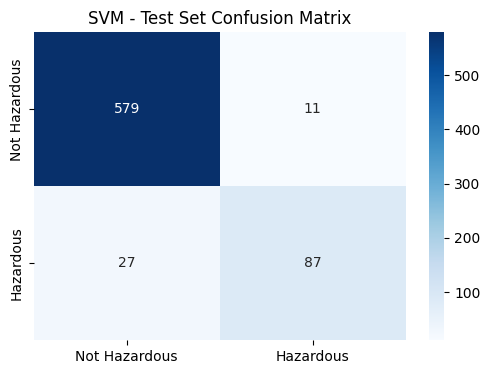

<Figure size 600x400 with 0 Axes>

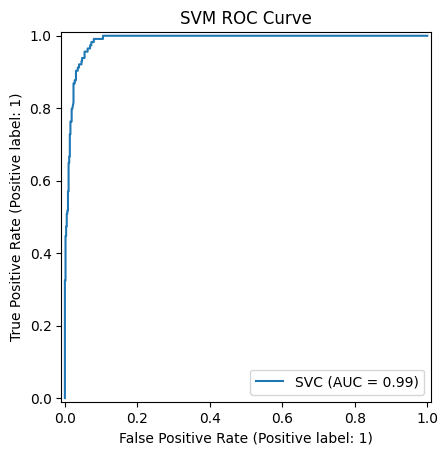

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_sc, y_train)

y_val_pred = svm.predict(X_val_sc)
y_val_prob = svm.predict_proba(X_val_sc)[:, 1]

print("Validation Set:")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_prob):.3f}")


y_test_pred = svm.predict(X_test_sc)
y_test_prob = svm.predict_proba(X_test_sc)[:, 1]

print("Test Set:")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_prob):.3f}")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
plt.title('SVM - Test Set Confusion Matrix')
plt.show()

plt.figure(figsize=(6,4))
RocCurveDisplay.from_estimator(svm, X_test_sc, y_test)
plt.title('SVM ROC Curve')
plt.show()


Accuracy: 94.60%

Insight: SVM performed decently, especially in precision (0.88), but with a slightly lower recall (0.76). It may miss some hazardous cases, which can be a concern in safety-critical applications.

 (Mean CV ROC AUC: 0.927)
Validation Set :
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       604
           1       0.72      0.49      0.59        99

    accuracy                           0.90       703
   macro avg       0.82      0.73      0.77       703
weighted avg       0.89      0.90      0.89       703

ROC AUC: 0.938
Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       590
           1       0.85      0.46      0.59       114

    accuracy                           0.90       704
   macro avg       0.88      0.72      0.77       704
weighted avg       0.90      0.90      0.89       704

ROC AUC: 0.953


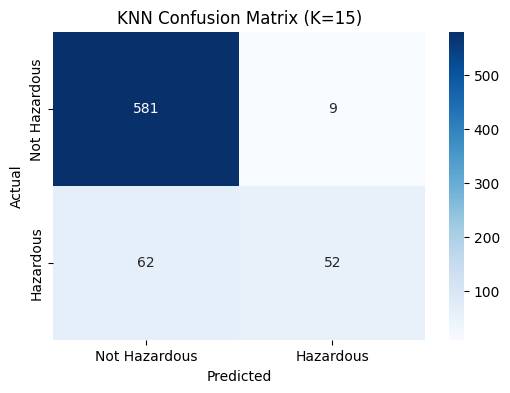

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

k_values = range(3, 16)
cv_auc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_sc, y_train,cv=StratifiedKFold(5),  scoring='roc_auc')
    cv_auc_scores.append(np.mean(scores))

best_k = k_values[np.argmax(cv_auc_scores)]
print(f" (Mean CV ROC AUC: {np.max(cv_auc_scores):.3f})")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_sc, y_train)


y_val_pred = final_knn.predict(X_val_sc)
y_val_proba = final_knn.predict_proba(X_val_sc)[:, 1]

print("Validation Set :")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba):.3f}")

y_test_pred = final_knn.predict(X_test_sc)
y_test_proba = final_knn.predict_proba(X_test_sc)[:, 1]

print("Test Set:")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.3f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
plt.title(f'KNN Confusion Matrix (K={best_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy: 89.91%

Insight: KNN showed the lowest recall (0.45), which means it missed more hazardous asteroids than any other model. Despite decent precision, it's not reliable for this specific use-case.



Cross-Validation Results:
ROC AUC Scores: [0.99599554 0.99011557 0.99129832 0.99691394 0.99317378]
Mean ROC AUC: 0.993 (±0.003)

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       604
           1       0.91      0.96      0.94        99

    accuracy                           0.98       703
   macro avg       0.95      0.97      0.96       703
weighted avg       0.98      0.98      0.98       703

ROC AUC: 0.997

Test Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       590
           1       0.91      0.96      0.93       114

    accuracy                           0.98       704
   macro avg       0.95      0.97      0.96       704
weighted avg       0.98      0.98      0.98       704

ROC AUC: 0.998


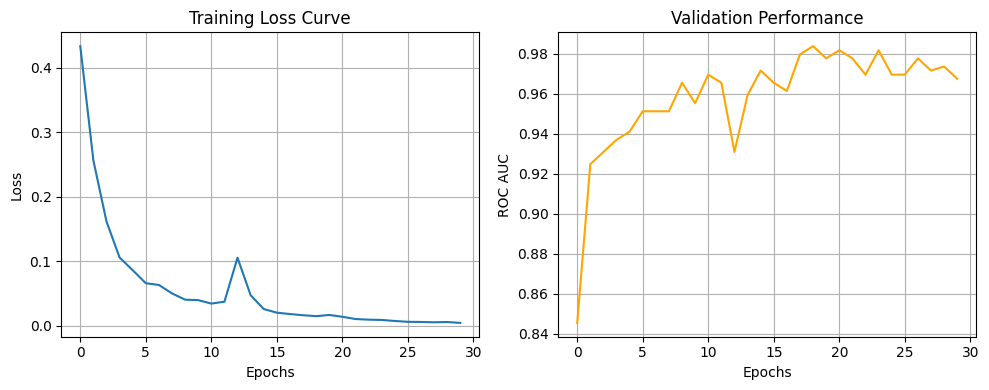

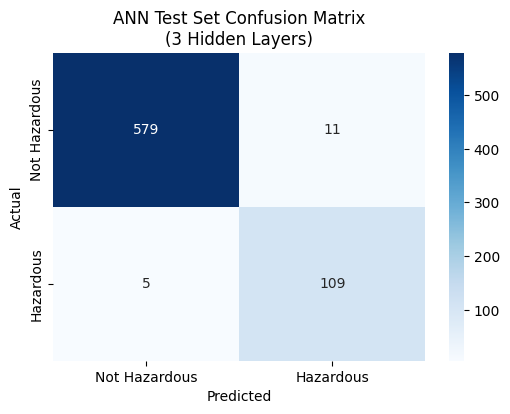

<ipython-input-28-c82c857de6cc>:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


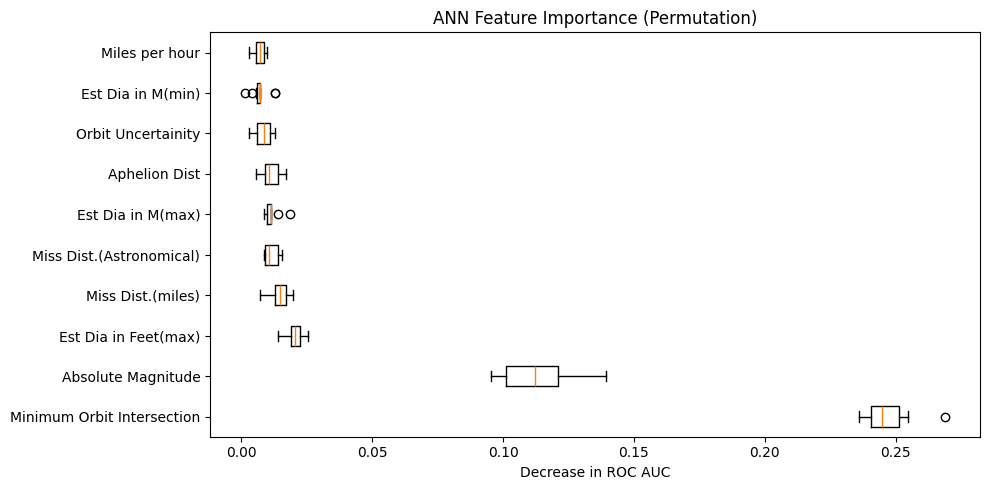

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ann = MLPClassifier(hidden_layer_sizes=(128, 64, 32),  # Three hidden layers
                   activation='relu',
                   solver='adam',
                   alpha=0.001,  # L2 regularization
                   batch_size=64,
                   max_iter=300,
                   random_state=42,
                   early_stopping=True,
                   validation_fraction=0.15,
                   n_iter_no_change=10)

# K-Fold Cross Validation (k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ann, X_train_sc, y_train, cv=cv, scoring='roc_auc')

print("Cross-Validation Results:")
print(f"ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC: {np.mean(cv_scores):.3f} (±{np.std(cv_scores):.3f})")


ann.fit(X_train_sc, y_train)

# Validation
y_val_pred = ann.predict(X_val_sc)
y_val_proba = ann.predict_proba(X_val_sc)[:, 1]

print("\nValidation Set Performance:")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba):.3f}")

# Test Set
y_test_pred = ann.predict(X_test_sc)
y_test_proba = ann.predict_proba(X_test_sc)[:, 1]

print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.3f}")


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(ann.loss_curve_, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(ann.validation_scores_, color='orange', label='Validation ROC AUC')
plt.title('Validation Performance')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix with Normalization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
plt.title('ANN Test Set Confusion Matrix\n(3 Hidden Layers)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


from sklearn.inspection import permutation_importance
result = permutation_importance(ann, X_val_sc, y_val, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()[::-1][:10]
plt.figure(figsize=(10, 5))
plt.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
plt.title("ANN Feature Importance (Permutation)")
plt.xlabel("Decrease in ROC AUC")
plt.tight_layout()
plt.show()

Accuracy: 97.73%

Insight: The ANN model performed excellently, with high precision, recall, and F1-score. It’s a strong alternative to Decision Tree with better generalization. Slightly lower metrics but more reliable on unseen data.


# Conclusion


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'Logistic Regression': lr,
    'SVM': svm,
    'KNN': final_knn,
    'ANN': ann
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
results = []

for model_name, model in models.items():
    if model_name == 'ANN':
        y_pred = (model.predict(X_test_sc).ravel() > 0.5).astype(int)
        y_prob = model.predict(X_test_sc).ravel()
    else:
        y_pred = model.predict(X_test_sc)
        y_prob = model.predict_proba(X_test_sc)[:, 1]

    results.append([
        model_name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])

comparison_df = pd.DataFrame(results, columns=['Model'] + metrics)
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Decision Tree  0.995739   0.974359  1.000000  0.987013  0.997458
1          Naive Bayes  0.914773   0.666667  0.947368  0.782609  0.953747
2  Logistic Regression  0.943182   0.753425  0.964912  0.846154  0.984924
3                  SVM  0.946023   0.887755  0.763158  0.820755  0.987467
4                  KNN  0.899148   0.852459  0.456140  0.594286  0.953293
5                  ANN  0.977273   0.908333  0.956140  0.931624  0.968748


**Decision Tree** is the best suited model here

giving the
**Highest Accuracy:** 99.57%

**Recall:** 1.000  It catches all hazardous asteroids (which is critical in real-world applications like space threat prediction).

**F1-Score:** 0.987 Excellent balance of precision and recall.

**ROC AUC:** 0.997  Model is extremely good at distinguishing between classes.



ANN (Artificial Neural Network) also performs very well with more generalization and slightly lower metrics, making it close to second robust model.